In [327]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [328]:
np.set_printoptions(precision = 2)

In [329]:
#load data

(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [330]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, '9')

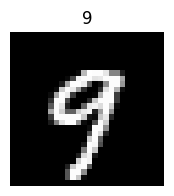

In [331]:
#Display a random sample

x_45 = X_train[45]
plt.figure(figsize =(2,2))
plt.imshow(x_45,cmap = 'gray')
plt.axis('off')
plt.title(f'{y_train[45]}')

In [332]:
#Reshaping the image data making pixel values, its features
#Normalizing by dividing by the hignest pixel value 255, making pixel values into values between 0 and 1.

X_train = X_train.reshape(len(X_train),28*28)/255
X_test = X_test.reshape(len(X_test),28*28)/255

In [333]:
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size = 0.5,random_state = 42)

In [334]:
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(5000, 784)
(5000,)
(5000, 784)
(5000,)


In [335]:
y_train.shape,y_test.shape

((60000,), (5000,))

In [336]:
# Model Building

tf.random.set_seed(1) #for reproducability of random results.

model = Sequential([
    tf.keras.Input(shape = (X_train.shape[1],)),
    Dense(units = 32,activation = 'relu',name = 'L1'),
    Dense(units = 64,activation = 'relu',name = 'L2'),
    Dense(units = 10,activation = 'linear',name = 'L3'),
])

In [337]:
# Compiling Model

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']
)

In [338]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 32)                25120     
                                                                 
 L2 (Dense)                  (None, 64)                2112      
                                                                 
 L3 (Dense)                  (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [339]:
#training the model

train_hist = model.fit(X_train,y_train,
          epochs = 10,
          verbose = 1,
          batch_size = 256,
          validation_data = (X_val,y_val)
         )

Epoch 1/10
235/235 [==============================] - 4s 12ms/step - loss: 0.6033 - accuracy: 0.8336 - val_loss: 0.2601 - val_accuracy: 0.9246
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.2379 - accuracy: 0.9315 - val_loss: 0.2066 - val_accuracy: 0.9372
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1912 - accuracy: 0.9450 - val_loss: 0.1757 - val_accuracy: 0.9480
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1636 - accuracy: 0.9530 - val_loss: 0.1637 - val_accuracy: 0.9524
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1442 - accuracy: 0.9584 - val_loss: 0.1424 - val_accuracy: 0.9596
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1262 - accuracy: 0.9628 - val_loss: 0.1328 - val_accuracy: 0.9592
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1142 - accuracy: 0.9660 - val_loss: 0.1287 - val_accuracy: 0.9602
E

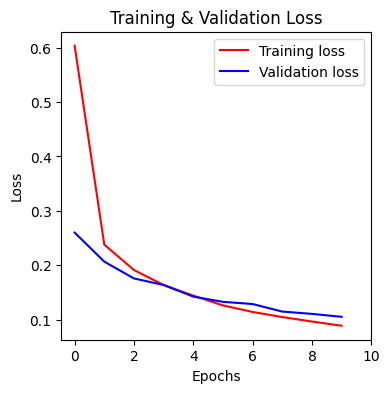

In [340]:
plt.figure(figsize = (4,4))
plt.plot(train_hist.epoch,train_hist.history['loss'],c = 'r',label = 'Training loss')
plt.plot(train_hist.epoch,train_hist.history['val_loss'],c = 'b',label = 'Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,11,2))
plt.legend()
plt.show()

In [341]:
#Predict 
pred = model.predict(X_test) #reshaping to make 2D

157/157 [==============================] - 1s 4ms/step


In [342]:
pred_class = np.argmax(pred_sft,axis = 1)
pred_class[:5]

array([6, 2, 3, 7, 2], dtype=int64)

In [343]:
pred_sft = tf.nn.softmax(pred).numpy()

### Testing the Model

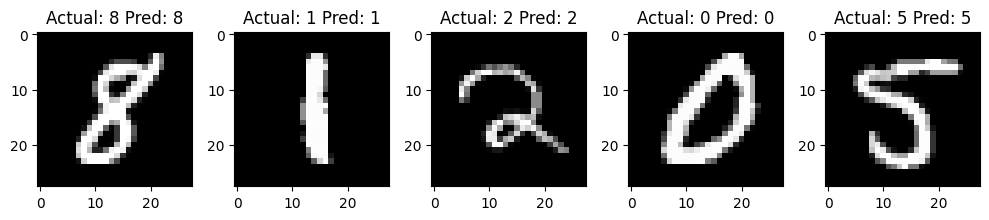

In [366]:
fig,ax = plt.subplots(1,5,figsize = (10,10))
test = np.random.randint(0,X_test.shape[0],5)
for i,j in enumerate(test):
    ax[i].imshow(X_test[j].reshape(28,28),cmap = 'gray')
    ax[i].set_title(f'Actual: {y_test[j]} Pred: {pred_class[j]}')
plt.tight_layout()
plt.show()

#### **Inference : Model generalizes well on unseen data**